### **(11) 뱀**

**문제 상황**

* 게임은 NxN 정사각 보드위에서 진행
* 몇몇 칸에는 사과가 놓여져 있다. 
* 보드의 상하좌우 끝에 벽이 있다.
* 게임 시작 시 뱀은 맨위 맨좌측에 위치
* 뱀의 길이는 1
* 뱀은 처음에 오른쪽을 향한다

**문제**

* 먼저 뱀은 몸길이를 늘려 머리를 다음칸에 위치시킨다.
* 만약 벽이나 자기자신의 몸과 부딪히면 게임이 끝난다.
* 만약 이동한 칸에 사과가 있다면, 그 칸에 있던 사과가 없어지고 꼬리는 움직이지 않는다.
* 만약 이동한 칸에 사과가 없다면, 몸길이를 줄여서 꼬리가 위치한 칸을 비워준다. 즉, 몸길이는 변하지 않는다.
* 사과의 위치와 뱀의 이동경로가 주어질 때 이 게임이 몇 초에 끝나는지 계산하라.

**입력 조건**

* 첫째 줄에 보드의 크기 N이 주어진다.(2 ≤ N ≤ 100) 다음 줄에 사과의 개수 K가 주어진다. (0 ≤ K ≤ 100) 
* 다음 K개의 줄에는 사과의 위치가 주어지는데, 첫 번째 정수는 행, 두 번째 정수는 열 의치를 의미한다.  
  사과의 위치는 모두 다르며, 맨 위 맨 좌측(1행 1열)에는 사과가 없다. 
* 다음 줄에는 뱀의 방향 변환 횟수 L이 주어진다. (1 ≤ L ≤ 100)
* 다음 L개의 줄에는 뱀의 방향 변환 정보가 주어지는데 정수 X와 문자 C로 이루어져 있으며, 게임 시작으로부터 X초가 끝난 뒤에 왼쪽(C가 'L') 또는 오른쪽(C가 'D')으로 90도 방향을 회전시킨다는 뜻입니다. X는 10,000 이하의 양의 정수이며, 방향 전환 정보는 X가 증가하는 순으로 주어진다. 

**출력 조건**

* 첫째 줄에 게임이 몇 초에 끝나는지 출력

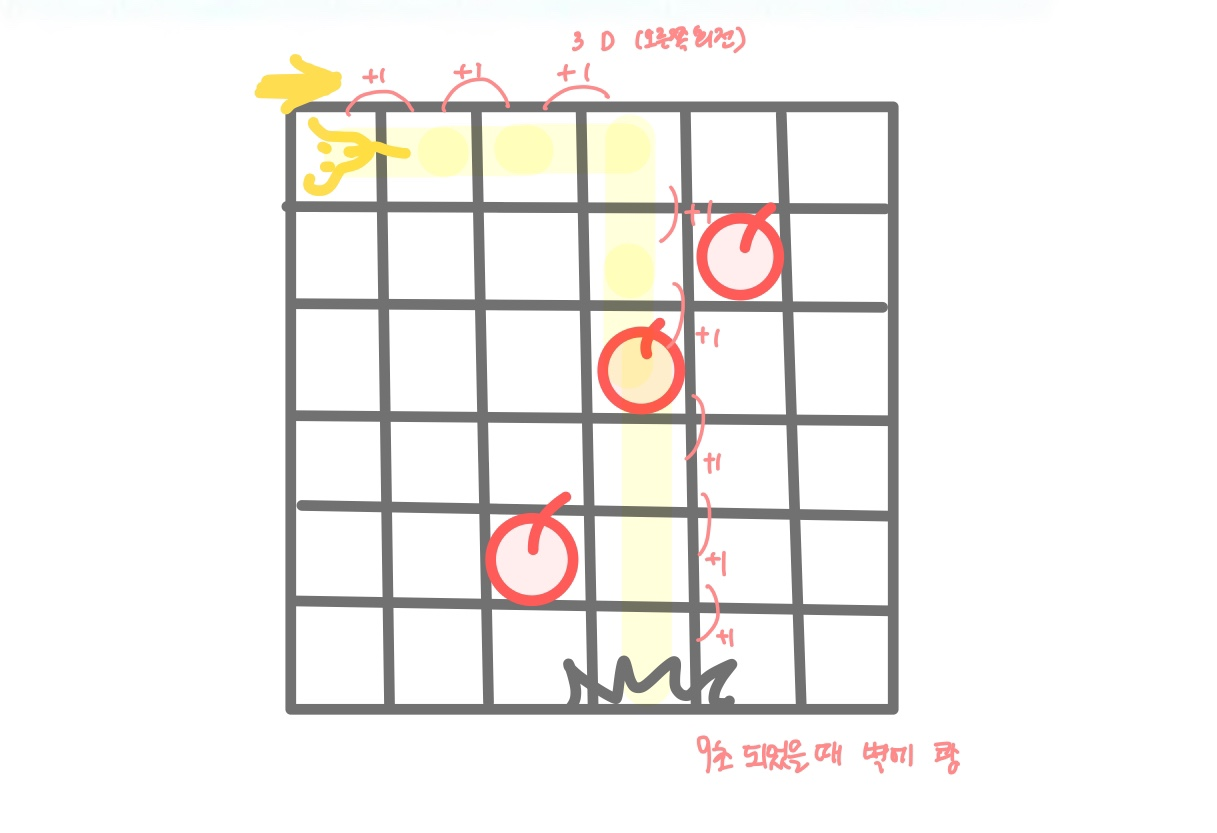

In [15]:
n = int(input())   # 보드의 크기
k = int(input())   # 사과의 개수
data = [[0] * (n + 1) for _ in range(n + 1)] # 맵 정보 
info = [] # 방향 회전 정보


# 맵 정보(사과 있는 곳은 1로 표시)
for _ in range(k) :
    a, b = map(int, input().split())
    data[a][b]= 1
    
    
# 방향 회전 정보 입력 
l = int(input())
for _ in range(l):
    x, c = input().split()
    info.append((int(x), c))
    
    
# 처음에는 오른쪽을 보고 있으므로(동, 남, 서, 북)
dx = [0, 1, 0, -1]
dy = [1, 0, -1, 0]

def turn(direction, c) :
    if c == "L" :
        direction = (direction - 1) % 4
        
    else : 
        direction = (direction + 1) % 4
        
    return direction 


def simulate() :
    x, y = 1, 1 # 뱀의 머리 위치 
    data[x][y] = 2 # 뱀이 존재하는 위치는 2로 표시 
    direction = 0 # 처음에는 동쪽을 보고 있음
    time = 0 # 시작한 뒤에 지난 '초' 시간
    index =0 # 다음에 회전할 정보 
    q = [(x, y)] # 뱀이 차지하고 있는 위치 정보(꼬리가 앞쪽)
    while True : 
        nx = x + dx[direction]
        ny = y + dy[direction]
        
        # 맵 범위 안에 있고, 뱀의 몸통이 없는 위치라면
        if 1 <= nx and nx <= n and 1 <= ny and ny <= n and data[nx][ny] != 2 :
            #사과가 없다면 이동 후에 꼬리 제거 
            if data[nx][ny] == 0 :
                data[nx][ny] = 2 
                q.append((nx, ny))
                px, py = q.pop(0)
                data[px][py] = 0 
                
                
            # 사과가 있다면 이동 후에 꼬리 그대로 두기
            if data[nx][ny] == 1:
                data[nx][ny] = 2
                q.append((nx, ny))
                
            
        # 벽이나 뱀의 몸통과 부딪혔다면
        else : 
            time += 1
            break
            
        x, y = nx, ny # 다음 위치로 머리를 이동 
        time += 1
        
        if index < len(info) and time == info[index][0]:
            direction = turn(direction, info[index][1])
            index += 1
    return time


print(simulate())


6
3
3 4
2 5
5 3
3
3 D
15 L
17 D
9


In [12]:
n = int(input())   # 보드의 크기
k = int(input())   # 사과의 개수
data = [[0] * (n + 1) for _ in range(n + 1)] # 맵 정보 
info = [] # 방향 회전 정보


# 맵 정보(사과 있는 곳은 1로 표시)
for _ in range(k) :
    a, b = map(int, input().split())
    data[a][b]= 1
    
    
# 방향 회전 정보 입력 
l = int(input())
for _ in range(l):
    x, c = input().split()
    info.append((int(x), c))
    
    
# 처음에는 오른쪽을 보고 있으므로(동, 남, 서, 북)
dx = [0, 1, 0, -1]
dy = [1, 0, -1, 0]

def turn(direction, c) :
    if c == "L" :
        direction = (direction - 1) % 4
        
    else : 
        direction = (direction + 1) % 4
        
    return direction 


def simulate() :
    x, y = 1, 1 # 뱀의 머리 위치 
    data[x][y] = 2 # 뱀이 존재하는 위치는 2로 표시 
    direction = 0 # 처음에는 동쪽을 보고 있음
    time = 0 # 시작한 뒤에 지난 '초' 시간
    index =0 # 다음에 회전할 정보 
    q = [(x, y)] # 뱀이 차지하고 있는 위치 정보(꼬리가 앞쪽)
    while True : 
        nx = x + dx[direction]
        ny = y + dy[direction]
        
        # 맵 범위 안에 있고, 뱀의 몸통이 없는 위치라면
        if 1 <= nx and nx <= n and 1 <= ny and ny <= n and data[nx][ny] != 2 :
            #사과가 없다면 이동 후에 꼬리 제거 
            if data[nx][ny] == 0 :
                data[nx][ny] = 2 
                q.append((nx, ny))
                px, py = q.pop(0)
                data[px][py] = 0 
                
                
            # 사과가 있다면 이동 후에 꼬리 그대로 두기
            if data[nx][ny] == 1:
                data[nx][ny] = 2
                q.append((nx, ny))
                
            
        # 벽이나 뱀의 몸통과 부딪혔다면
        else : 
            time += 1
            break
            
        x, y = nx, ny # 다음 위치로 머리를 이동 
        time += 1
        
        if index < len(info) and time == info[index][0]:
            direction = turn(direction, info[index][1])
            index += 1
    return time


print(simulate())


10
4
1 2
1 3
1 4
1 5
4
8 D
10 D
11 D
13 L
21


In [13]:
n = int(input())   # 보드의 크기
k = int(input())   # 사과의 개수
data = [[0] * (n + 1) for _ in range(n + 1)] # 맵 정보 
info = [] # 방향 회전 정보


# 맵 정보(사과 있는 곳은 1로 표시)
for _ in range(k) :
    a, b = map(int, input().split())
    data[a][b]= 1
    
    
# 방향 회전 정보 입력 
l = int(input())
for _ in range(l):
    x, c = input().split()
    info.append((int(x), c))
    
    
# 처음에는 오른쪽을 보고 있으므로(동, 남, 서, 북)
dx = [0, 1, 0, -1]
dy = [1, 0, -1, 0]

def turn(direction, c) :
    if c == "L" :
        direction = (direction - 1) % 4
        
    else : 
        direction = (direction + 1) % 4
        
    return direction 


def simulate() :
    x, y = 1, 1 # 뱀의 머리 위치 
    data[x][y] = 2 # 뱀이 존재하는 위치는 2로 표시 
    direction = 0 # 처음에는 동쪽을 보고 있음
    time = 0 # 시작한 뒤에 지난 '초' 시간
    index =0 # 다음에 회전할 정보 
    q = [(x, y)] # 뱀이 차지하고 있는 위치 정보(꼬리가 앞쪽)
    while True : 
        nx = x + dx[direction]
        ny = y + dy[direction]
        
        # 맵 범위 안에 있고, 뱀의 몸통이 없는 위치라면
        if 1 <= nx and nx <= n and 1 <= ny and ny <= n and data[nx][ny] != 2 :
            #사과가 없다면 이동 후에 꼬리 제거 
            if data[nx][ny] == 0 :
                data[nx][ny] = 2 
                q.append((nx, ny))
                px, py = q.pop(0)
                data[px][py] = 0 
                
                
            # 사과가 있다면 이동 후에 꼬리 그대로 두기
            if data[nx][ny] == 1:
                data[nx][ny] = 2
                q.append((nx, ny))
                
            
        # 벽이나 뱀의 몸통과 부딪혔다면
        else : 
            time += 1
            break
            
        x, y = nx, ny # 다음 위치로 머리를 이동 
        time += 1
        
        if index < len(info) and time == info[index][0]:
            direction = turn(direction, info[index][1])
            index += 1
    return time


print(simulate())


10
5
1 5
1 3
1 2
1 6
1 7
4
8 D
10 D
11 D
13 L
13
